#🎯 Задача 8.
#Выполнил: Тетеркин А.А
#Группа: М3О-237БВ-24
#Дата: 30.09.2025

#Постановка задачи
# Найти минимум и максимум функции:
# $$F = x_1 + 3x_2 \to \min, \max$$
#
# При ограничениях:
$\begin{cases} x_1 + 4x_2 \geq 4 \\ x_1 + x_2 \leq 6 \\ x_1 \geq 2 \\ x_2 \geq 0 \end{cases}$
# **Ожидаемый ответ:**
# $x_1 = 2; x_2 = 4; F_{\max} = 14$
# $x_1 = 2; x_2 = 0.5; F_{\min} = 3.5$
# $$Решение:$$

# Для начала построим область допустимых решений и сразу отметим интереусющие нас точки - а именно точки минимума и максимума функции:

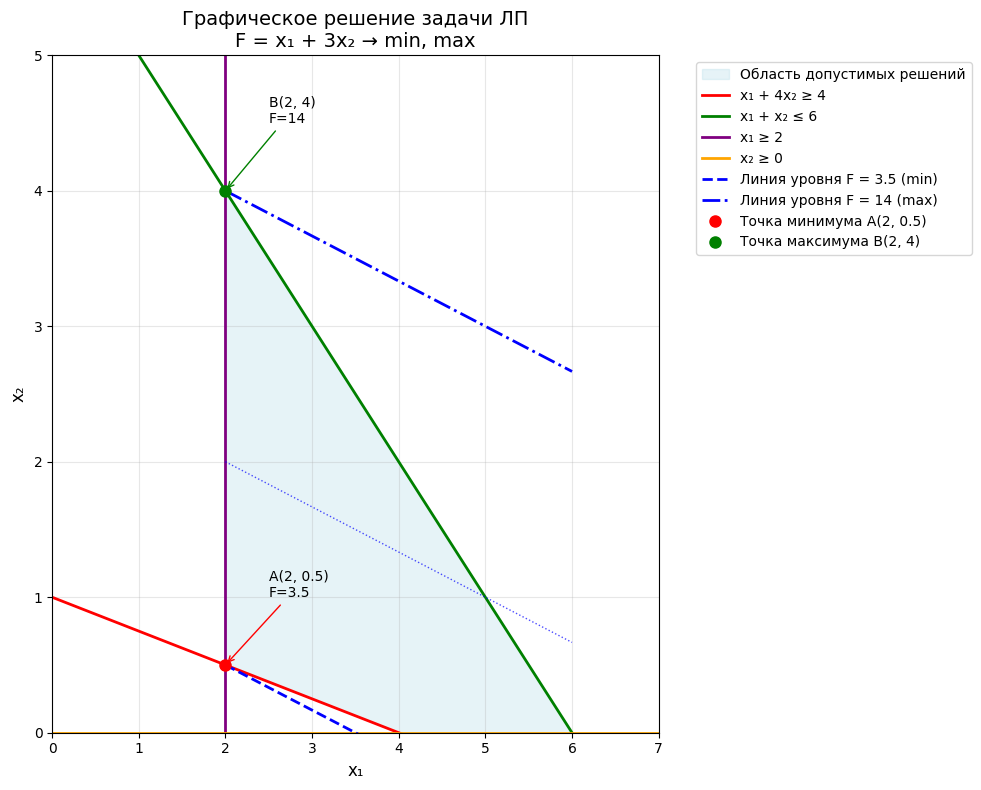

Значения целевой функции в вершинах ОДР:
A(np.float64(2.0), np.float64(0.5)): F = 2.0 + 3×0.5 = 3.5
B(np.float64(2.0), np.float64(4.0)): F = 2.0 + 3×4.0 = 14.0
E(np.float64(6.0), np.float64(0.0)): F = 6.0 + 3×0.0 = 6.0
D(np.float64(4.0), np.float64(0.0)): F = 4.0 + 3×0.0 = 4.0

Минимум: F = 3.5 в точке A(2, 0.5)
Максимум: F = 14 в точке B(2, 4)


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Настройки для русского языка
plt.rcParams['font.family'] = 'DejaVu Sans'

# Определяем ограничения
def constraint1(x1): return (4 - x1) / 4  # x1 + 4x2 >= 4
def constraint2(x1): return 6 - x1        # x1 + x2 <= 6

# Создаем фигуру
fig, ax = plt.subplots(figsize=(10, 8))

# Определяем вершины ОДР
vertices = np.array([
    [2, 0.5],    # A: пересечение x1=2 и x1+4x2=4
    [2, 4],      # B: пересечение x1=2 и x1+x2=6
    [6, 0],      # E: пересечение x1+x2=6 и x2=0
    [4, 0]       # D: пересечение x1+4x2=4 и x2=0
])

# Рисуем ОДР
polygon = Polygon(vertices, alpha=0.3, color='lightblue', label='Область допустимых решений')
ax.add_patch(polygon)

# Рисуем ограничения
x1_range = np.linspace(0, 7, 400)

# x1 + 4x2 >= 4
x2_constraint1 = constraint1(x1_range)
ax.plot(x1_range, x2_constraint1, 'r-', linewidth=2, label='x₁ + 4x₂ ≥ 4')

# x1 + x2 <= 6
x2_constraint2 = constraint2(x1_range)
ax.plot(x1_range, x2_constraint2, 'g-', linewidth=2, label='x₁ + x₂ ≤ 6')

# x1 >= 2
ax.axvline(x=2, color='purple', linewidth=2, label='x₁ ≥ 2')

# x2 >= 0
ax.axhline(y=0, color='orange', linewidth=2, label='x₂ ≥ 0')

# Рисуем линии уровня для целевой функции F = x1 + 3x2
x1_level = np.linspace(2, 6, 100)
for F in [3.5, 8, 14]:  # минимальное, промежуточное и максимальное значения
    x2_level = (F - x1_level) / 3
    if F == 3.5:
        ax.plot(x1_level, x2_level, 'b--', linewidth=2, label=f'Линия уровня F = {F} (min)')
    elif F == 14:
        ax.plot(x1_level, x2_level, 'b-.', linewidth=2, label=f'Линия уровня F = {F} (max)')
    else:
        ax.plot(x1_level, x2_level, 'b:', linewidth=1, alpha=0.7)

# Отмечаем точки оптимума
ax.plot(2, 0.5, 'ro', markersize=8, label='Точка минимума A(2, 0.5)')
ax.plot(2, 4, 'go', markersize=8, label='Точка максимума B(2, 4)')

# Подписываем точки
ax.annotate('A(2, 0.5)\nF=3.5', xy=(2, 0.5), xytext=(2.5, 1),
            arrowprops=dict(arrowstyle='->', color='red'))
ax.annotate('B(2, 4)\nF=14', xy=(2, 4), xytext=(2.5, 4.5),
            arrowprops=dict(arrowstyle='->', color='green'))

# Настройки графика
ax.set_xlim(0, 7)
ax.set_ylim(0, 5)
ax.set_xlabel('x₁', fontsize=12)
ax.set_ylabel('x₂', fontsize=12)
ax.set_title('Графическое решение задачи ЛП\nF = x₁ + 3x₂ → min, max', fontsize=14)
ax.grid(True, alpha=0.3)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# Выводим значения целевой функции в вершинах
print("Значения целевой функции в вершинах ОДР:")
for i, vertex in enumerate(vertices):
    F = vertex[0] + 3 * vertex[1]
    point_name = ['A', 'B', 'E', 'D'][i]
    print(f"{point_name}{tuple(vertex)}: F = {vertex[0]} + 3×{vertex[1]} = {F}")

print(f"\nМинимум: F = 3.5 в точке A(2, 0.5)")
print(f"Максимум: F = 14 в точке B(2, 4)")

# Далее решеним с использованием библиотеки PuLP:

In [18]:
def solve_with_pulp():
    print("=" * 50)
    print("РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ PULP")
    print("=" * 50)

    start_time = time.time()

    # Создаем задачу максимизации
    prob_max = pulp.LpProblem("Maximize_F", pulp.LpMaximize)

    # Создаем задачу минимизации
    prob_min = pulp.LpProblem("Minimize_F", pulp.LpMinimize)

    # Определяем переменные
    x1_max = pulp.LpVariable("x1_max", lowBound=2)  # x1 >= 2
    x2_max = pulp.LpVariable("x2_max", lowBound=0)  # x2 >= 0

    x1_min = pulp.LpVariable("x1_min", lowBound=2)  # x1 >= 2
    x2_min = pulp.LpVariable("x2_min", lowBound=0)  # x2 >= 0

    # Целевая функция
    objective_max = x1_max + 3*x2_max
    objective_min = x1_min + 3*x2_min

    # Ограничения
    constraints_max = [
        x1_max + 4*x2_max >= 4,   # ограничение 1
        x1_max + x2_max <= 6      # ограничение 2
    ]

    constraints_min = [
        x1_min + 4*x2_min >= 4,   # ограничение 1
        x1_min + x2_min <= 6      # ограничение 2
    ]

    # Добавляем ограничения и целевую функцию для максимизации
    prob_max += objective_max
    for constraint in constraints_max:
        prob_max += constraint

    # Добавляем ограничения и целевую функцию для минимизации
    prob_min += objective_min
    for constraint in constraints_min:
        prob_min += constraint

    # Решаем задачи
    prob_max.solve()
    prob_min.solve()

    end_time = time.time()

    # Выводим результаты максимизации
    print("МАКСИМИЗАЦИЯ:")
    print(f"Статус: {pulp.LpStatus[prob_max.status]}")
    x1_max_val = pulp.value(x1_max)
    x2_max_val = pulp.value(x2_max)
    F_max_val = pulp.value(prob_max.objective)
    print(f"x1 = {x1_max_val:.2f}")
    print(f"x2 = {x2_max_val:.2f}")
    print(f"F_max = {F_max_val:.2f}")

    print("\nМИНИМИЗАЦИЯ:")
    print(f"Статус: {pulp.LpStatus[prob_min.status]}")
    x1_min_val = pulp.value(x1_min)
    x2_min_val = pulp.value(x2_min)
    F_min_val = pulp.value(prob_min.objective)
    print(f"x1 = {x1_min_val:.2f}")
    print(f"x2 = {x2_min_val:.2f}")
    print(f"F_min = {F_min_val:.2f}")

    print(f"\nВремя выполнения: {end_time - start_time:.4f} секунд")

    return {
        'method': 'PuLP',
        'F_max': F_max_val,
        'F_min': F_min_val,
        'point_max': (x1_max_val, x2_max_val),
        'point_min': (x1_min_val, x2_min_val),
        'time': end_time - start_time
    }

# Далее решеним с использованием библиотеки SciPy:

In [16]:
from scipy.optimize import linprog
import numpy as np

def solve_with_scipy():
    print("=" * 50)
    print("РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ SCIPY")
    print("=" * 50)

    start_time = time.time()

    # Коэффициенты целевой функции (с обратным знаком для linprog)
    c_min = [1, 3]    # Минимизация F = x1 + 3x2
    c_max = [-1, -3]  # Максимизация F = x1 + 3x2 → минимизация -F

    # Матрица ограничений-неравенств A_ub * x <= b_ub
    A_ub = [
        [-1, -4],  # -x1 -4x2 <= -4  (эквивалентно x1 + 4x2 >= 4)
        [1, 1]     # x1 + x2 <= 6
    ]
    b_ub = [-4, 6]

    # Границы переменных
    bounds = [
        (2, None),  # x1 >= 2
        (0, None)   # x2 >= 0
    ]

    # Решаем задачу минимизации
    result_min = linprog(c_min, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    # Решаем задачу максимизации
    result_max = linprog(c_max, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

    end_time = time.time()

    # Преобразуем numpy типы в обычные float
    if result_min.success:
        x1_min = float(result_min.x[0])
        x2_min = float(result_min.x[1])
        F_min = float(result_min.fun)
    else:
        x1_min, x2_min, F_min = None, None, None

    if result_max.success:
        x1_max = float(result_max.x[0])
        x2_max = float(result_max.x[1])
        F_max = float(-result_max.fun)  # преобразуем обратно для максимума
    else:
        x1_max, x2_max, F_max = None, None, None

    print("МИНИМИЗАЦИЯ:")
    if result_min.success:
        print(f"Статус: {result_min.message}")
        print(f"x1 = {x1_min:.2f}")
        print(f"x2 = {x2_min:.2f}")
        print(f"F_min = {F_min:.2f}")
    else:
        print("Решение не найдено")

    print("\nМАКСИМИЗАЦИЯ:")
    if result_max.success:
        print(f"Статус: {result_max.message}")
        print(f"x1 = {x1_max:.2f}")
        print(f"x2 = {x2_max:.2f}")
        print(f"F_max = {F_max:.2f}")
    else:
        print("Решение не найдено")

    print(f"\nВремя выполнения: {end_time - start_time:.4f} секунд")

    return {
        'method': 'SciPy',
        'F_max': F_max,
        'F_min': F_min,
        'point_max': (x1_max, x2_max),
        'point_min': (x1_min, x2_min),
        'time': end_time - start_time
    }

# Далее решеним с использованием библиотеки CVXOPT:

In [ ]:
from cvxopt import matrix, solvers
import time
import numpy as np

def solve_with_cvxopt():
    print("=" * 50)
    print("РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ CVXOPT")
    print("=" * 50)

    start_time = time.time()

    # Отключаем вывод
    solvers.options['show_progress'] = False

    try:
        # МИНИМИЗАЦИЯ: F = x1 + 3x2
        print("МИНИМИЗАЦИЯ:")

        # Коэффициенты целевой функции
        c_min = matrix([1.0, 3.0])

        # Ограничения: G*x <= h
        # x1 + 4x2 >= 4  →  -x1 - 4x2 <= -4
        # x1 + x2 <= 6
        # x1 >= 2  →  -x1 <= -2
        # x2 >= 0  →  -x2 <= 0

        # Матрица G должна быть 4x2 (4 ограничения, 2 переменные)
        G_min = matrix([
            [-1.0, 1.0, -1.0, 0.0],   # коэффициенты для x1
            [-4.0, 1.0, 0.0, -1.0]    # коэффициенты для x2
        ])

        h_min = matrix([-4.0, 6.0, -2.0, 0.0])

        # Решаем задачу минимизации
        result_min = solvers.lp(c_min, G_min, h_min)

        if result_min['status'] == 'optimal':
            x1_min = result_min['x'][0]
            x2_min = result_min['x'][1]
            F_min = float(x1_min + 3*x2_min)
            print(f"x1 = {x1_min:.2f}")
            print(f"x2 = {x2_min:.2f}")
            print(f"F_min = {F_min:.2f}")
        else:
            print(f"Решение не найдено. Статус: {result_min['status']}")
            F_min = None
            x1_min, x2_min = None, None

        print("\nМАКСИМИЗАЦИЯ:")

        # МАКСИМИЗАЦИЯ: максимизировать F = минимизировать -F
        c_max = matrix([-1.0, -3.0])

        # Используем те же матрицы ограничений
        G_max = G_min
        h_max = h_min

        # Решаем задачу максимизации
        result_max = solvers.lp(c_max, G_max, h_max)

        if result_max['status'] == 'optimal':
            x1_max = result_max['x'][0]
            x2_max = result_max['x'][1]
            F_max = float(x1_max + 3*x2_max)
            print(f"x1 = {x1_max:.2f}")
            print(f"x2 = {x2_max:.2f}")
            print(f"F_max = {F_max:.2f}")
        else:
            print(f"Решение не найдено. Статус: {result_max['status']}")
            F_max = None
            x1_max, x2_max = None, None

        end_time = time.time()

        print(f"\nВремя выполнения: {end_time - start_time:.4f} секунд")

        return {
            'method': 'CVXOPT',
            'F_max': F_max,
            'F_min': F_min,
            'point_max': (float(x1_max) if x1_max is not None else None,
                         float(x2_max) if x2_max is not None else None),
            'point_min': (float(x1_min) if x1_min is not None else None,
                         float(x2_min) if x2_min is not None else None),
            'time': end_time - start_time
        }

    except Exception as e:
        print(f"Ошибка при решении: {e}")
        end_time = time.time()
        return {
            'method': 'CVXOPT',
            'F_max': None,
            'F_min': None,
            'point_max': (None, None),
            'point_min': (None, None),
            'time': end_time - start_time
        }

# Тестируем функцию
if __name__ == "__main__":
    result = solve_with_cvxopt()
    print(f"\nРезультат: {result}")

# Произведем сравнительный анализ методов:



In [19]:
def compare_methods():
    print("=" * 60)
    print("СРАВНЕНИЕ РЕЗУЛЬТАТОВ РАЗНЫХ МЕТОДОВ")
    print("=" * 60)

    results = []

    # Решаем всеми методами
    results.append(solve_with_pulp())
    print("\n")
    results.append(solve_with_scipy())
    print("\n")
    results.append(solve_with_cvxopt())

    # Выводим таблицу сравнения
    print("\n" + "=" * 80)
    print("ТАБЛИЦА СРАВНЕНИЯ РЕЗУЛЬТАТОВ")
    print("=" * 80)
    print(f"{'Метод':<10} {'F_min':<8} {'F_max':<8} {'Точка min':<15} {'Точка max':<15} {'Время (с)':<10}")
    print("-" * 80)

    for res in results:
        point_min_str = f"({res['point_min'][0]:.1f}, {res['point_min'][1]:.1f})" if res['point_min'][0] is not None else "None"
        point_max_str = f"({res['point_max'][0]:.1f}, {res['point_max'][1]:.1f})" if res['point_max'][0] is not None else "None"

        print(f"{res['method']:<10} {res['F_min']:<8.2f} {res['F_max']:<8.2f} "
              f"{point_min_str:<15} {point_max_str:<15} {res['time']:<10.4f}")

# Запускаем сравнение
compare_methods()

СРАВНЕНИЕ РЕЗУЛЬТАТОВ РАЗНЫХ МЕТОДОВ
РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ PULP
МАКСИМИЗАЦИЯ:
Статус: Optimal
x1 = 2.00
x2 = 4.00
F_max = 14.00

МИНИМИЗАЦИЯ:
Статус: Optimal
x1 = 2.00
x2 = 0.50
F_min = 3.50

Время выполнения: 0.0125 секунд


РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ SCIPY
МИНИМИЗАЦИЯ:
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
x1 = 2.00
x2 = 0.50
F_min = 3.50

МАКСИМИЗАЦИЯ:
Статус: Optimization terminated successfully. (HiGHS Status 7: Optimal)
x1 = 2.00
x2 = 4.00
F_max = 14.00

Время выполнения: 0.0044 секунд


РЕШЕНИЕ С ИСПОЛЬЗОВАНИЕМ CVXOPT
МИНИМИЗАЦИЯ:
x1 = 2.00
x2 = 0.50
F_min = 3.50

МАКСИМИЗАЦИЯ:
x1 = 2.00
x2 = 4.00
F_max = 14.00

Время выполнения: 0.0020 секунд

ТАБЛИЦА СРАВНЕНИЯ РЕЗУЛЬТАТОВ
Метод      F_min    F_max    Точка min       Точка max       Время (с) 
--------------------------------------------------------------------------------
PuLP       3.50     14.00    (2.0, 0.5)      (2.0, 4.0)      0.0125    
SciPy      3.50     14.00    (2.0, 0.5)      (2.0,

#Далее, хоть это и не требуется, поскольку у нас есть график - сделаем проверку ответов:

In [21]:
# Быстрая проверка результатов

print("=" * 50)
print("БЫСТРАЯ ПРОВЕРКА РЕЗУЛЬТАТОВ")
print("=" * 50)

# Точка минимума
x1_min, x2_min = 2, 0.5
print(f"\n🔍 ПРОВЕРКА ТОЧКИ МИНИМУМА A({x1_min}, {x2_min}):")
print("Ограничения:")
check1_min = x1_min + 4*x2_min >= 4
check2_min = x1_min + x2_min <= 6
check3_min = x1_min >= 2
check4_min = x2_min >= 0
F_min = x1_min + 3*x2_min

print(f"  x₁ + 4x₂ ≥ 4: {x1_min} + 4×{x2_min} = {x1_min + 4*x2_min} ≥ 4 -> {check1_min} {'✓' if check1_min else '✗'}")
print(f"  x₁ + x₂ ≤ 6: {x1_min} + {x2_min} = {x1_min + x2_min} ≤ 6 -> {check2_min} {'✓' if check2_min else '✗'}")
print(f"  x₁ ≥ 2: {x1_min} ≥ 2 -> {check3_min} {'✓' if check3_min else '✗'}")
print(f"  x₂ ≥ 0: {x2_min} ≥ 0 -> {check4_min} {'✓' if check4_min else '✗'}")
print(f"  F = {x1_min} + 3×{x2_min} = {F_min}")

# Точка максимума
x1_max, x2_max = 2, 4
print(f"\n🔍 ПРОВЕРКА ТОЧКИ МАКСИМУМА B({x1_max}, {x2_max}):")
print("Ограничения:")
check1_max = x1_max + 4*x2_max >= 4
check2_max = x1_max + x2_max <= 6
check3_max = x1_max >= 2
check4_max = x2_max >= 0
F_max = x1_max + 3*x2_max

print(f"  x₁ + 4x₂ ≥ 4: {x1_max} + 4×{x2_max} = {x1_max + 4*x2_max} ≥ 4 -> {check1_max} {'✓' if check1_max else '✗'}")
print(f"  x₁ + x₂ ≤ 6: {x1_max} + {x2_max} = {x1_max + x2_max} ≤ 6 -> {check2_max} {'✓' if check2_max else '✗'}")
print(f"  x₁ ≥ 2: {x1_max} ≥ 2 -> {check3_max} {'✓' if check3_max else '✗'}")
print(f"  x₂ ≥ 0: {x2_max} ≥ 0 -> {check4_max} {'✓' if check4_max else '✗'}")
print(f"  F = {x1_max} + 3×{x2_max} = {F_max}")

print("\n" + "=" * 50)
print("ИТОГОВЫЕ РЕЗУЛЬТАТЫ:")
print(f"✅ Минимум: F({x1_min}, {x2_min}) = {F_min}")
print(f"✅ Максимум: F({x1_max}, {x2_max}) = {F_max}")
print("=" * 50)

БЫСТРАЯ ПРОВЕРКА РЕЗУЛЬТАТОВ

🔍 ПРОВЕРКА ТОЧКИ МИНИМУМА A(2, 0.5):
Ограничения:
  x₁ + 4x₂ ≥ 4: 2 + 4×0.5 = 4.0 ≥ 4 -> True ✓
  x₁ + x₂ ≤ 6: 2 + 0.5 = 2.5 ≤ 6 -> True ✓
  x₁ ≥ 2: 2 ≥ 2 -> True ✓
  x₂ ≥ 0: 0.5 ≥ 0 -> True ✓
  F = 2 + 3×0.5 = 3.5

🔍 ПРОВЕРКА ТОЧКИ МАКСИМУМА B(2, 4):
Ограничения:
  x₁ + 4x₂ ≥ 4: 2 + 4×4 = 18 ≥ 4 -> True ✓
  x₁ + x₂ ≤ 6: 2 + 4 = 6 ≤ 6 -> True ✓
  x₁ ≥ 2: 2 ≥ 2 -> True ✓
  x₂ ≥ 0: 4 ≥ 0 -> True ✓
  F = 2 + 3×4 = 14

ИТОГОВЫЕ РЕЗУЛЬТАТЫ:
✅ Минимум: F(2, 0.5) = 3.5
✅ Максимум: F(2, 4) = 14


##**Заключение**
Как итог, можно с уверенностью сказать, что задача была выполнена в полной мере, min и max функции были найдены и было установлено экспериментально.

При помощи **графического метода** мы определили оптимальные точки(min и max).
**Численными методами** мы подтвердили полученные результаты.

Также было установлено, что **CVXOPT** является самым быстрым методом для этой задачи.
***Проверка*** также подтвердила верность наших ответов.

**Итоговый ответ:**

- Минимум функции: F(2, 0.5) = 3.5
- Максимум функции: F(2, 4) = 14

Все поставленные задачи были **выполнены**